## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Arms and Arm distribution

In [2]:
arm_distribution = np.arange(0.2, 0.3, 0.01)
K = 10

## UCB-Star Algorithm

In [3]:
def UCB_star(n, m, num_simulations):
    success = 0
    for _ in range(num_simulations):
        mu_estimated = np.zeros((m, K))
        cnt = np.zeros((m, K))
        for i in range(n):
            reward = np.zeros(m)
            arm_index = np.zeros(m, dtype=int)
            if i < K:
                for j in range(m):
                    arm_index[j] = i
                    reward[j] = np.random.binomial(1, arm_distribution[i])
            else:
                for j in range(m):
                    arm_index[j] = int(np.argmax(mu_estimated[j] + np.sqrt(1/cnt[j])))
                    reward[j] = np.random.binomial(1, arm_distribution[arm_index[j]])
                    
            mu_estimated[0][arm_index[0]] = (mu_estimated[0][arm_index[0]]*cnt[0][arm_index[0]] + reward[0])/(cnt[0][arm_index[0]] + 1)
            cnt[0][arm_index[0]] += 1
            for j in range(1, m):
                mu_estimated[j][arm_index[j]] = (mu_estimated[j][arm_index[j]]*cnt[j][arm_index[j]] + reward[j])/(cnt[j][arm_index[j]] + 1)
                cnt[j][arm_index[j]] += 1
                mu_estimated[j][arm_index[0]] = (mu_estimated[j][arm_index[0]]*cnt[j][arm_index[0]] + reward[j])/(cnt[j][arm_index[0]] + 1)
                cnt[j][arm_index[0]] += 1
                
                mu_estimated[0][arm_index[j]] = (mu_estimated[0][arm_index[j]]*cnt[0][arm_index[j]] + reward[j])/(cnt[0][arm_index[j]] + 1)
                cnt[0][arm_index[j]] += 1
        estimated_best_arm = np.argmax(mu_estimated[0])
        if estimated_best_arm == 9:
            success += 1
    return success/num_simulations, mu_estimated, cnt

Current number of rounds:  10
Probability of Error: 0.871
Current number of rounds:  50
Probability of Error: 0.72
Current number of rounds:  100
Probability of Error: 0.642
Current number of rounds:  500
Probability of Error: 0.44199999999999995
Current number of rounds:  1000
Probability of Error: 0.32499999999999996
Current number of rounds:  2000
Probability of Error: 0.18700000000000006
Current number of rounds:  3500
Probability of Error: 0.10499999999999998
Current number of rounds:  5000
Probability of Error: 0.05500000000000005


Text(0.5, 1.0, 'UCB-Star algorithm')

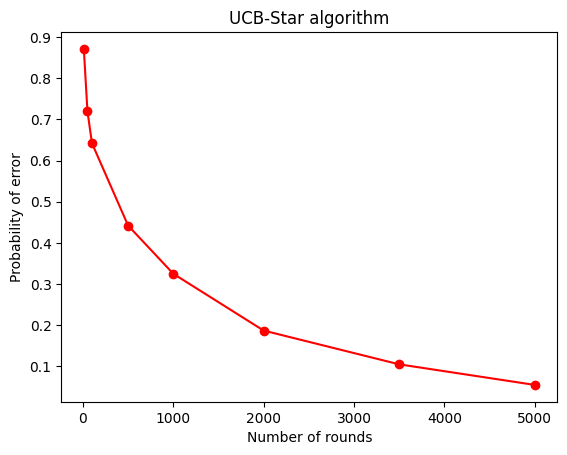

In [52]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
p_error_UCB = []
for i in n:
    print("Current number of rounds: ", i)
    p_error_UCB.append(1 - UCB_star(i, 15, 1000)[0])
    print("Probability of Error:", p_error_UCB[-1])
    
plt.plot(n, p_error_UCB, marker='o', color='r')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('UCB-Star algorithm')

## FYL-Star Algorithm

In [4]:
def FYL_star(n, m, num_simulations):
    success = 0
    for _ in range(num_simulations):
        mu_estimated = np.zeros((m, K))
        cnt = np.zeros((m, K))
        for i in range(n):
            reward = np.zeros(m)
            arm_index = np.zeros(m, dtype=int)
            if i < K:
                for j in range(m):
                    arm_index[j] = i
                    reward[j] = np.random.binomial(1, arm_distribution[i])
            elif i == K:
                for j in range(m):
                    if j == 0:
                        arm_index[j] = int(np.argmax(mu_estimated[j] + np.sqrt(1/cnt[j])))
                        reward[j] = np.random.binomial(1, arm_distribution[arm_index[j]])
                    else:
                        arm_index[j] = int(np.random.randint(0, K))
                        reward[j] = np.random.binomial(1, arm_distribution[arm_index[j]])
            else:
                for j in range(m):
                    if j == 0:
                        arm_index[j] = int(np.argmax(mu_estimated[j] + np.sqrt(1/cnt[j])))
                        reward[j] = np.random.binomial(1, arm_distribution[arm_index[j]])
                    else:
                        arm_index[j] = arm_index[0]
                        reward[j] = np.random.binomial(1, arm_distribution[arm_index[j]])
                    
            mu_estimated[0][arm_index[0]] = (mu_estimated[0][arm_index[0]]*cnt[0][arm_index[0]] + reward[0])/(cnt[0][arm_index[0]] + 1)
            cnt[0][arm_index[0]] += 1
            for j in range(1, m):
                mu_estimated[j][arm_index[j]] = (mu_estimated[j][arm_index[j]]*cnt[j][arm_index[j]] + reward[j])/(cnt[j][arm_index[j]] + 1)
                cnt[j][arm_index[j]] += 1
                mu_estimated[j][arm_index[0]] = (mu_estimated[j][arm_index[0]]*cnt[j][arm_index[0]] + reward[j])/(cnt[j][arm_index[0]] + 1)
                cnt[j][arm_index[0]] += 1
                
                mu_estimated[0][arm_index[j]] = (mu_estimated[0][arm_index[j]]*cnt[0][arm_index[j]] + reward[j])/(cnt[0][arm_index[j]] + 1)
                cnt[0][arm_index[j]] += 1
        estimated_best_arm = np.argmax(mu_estimated[0])
        if estimated_best_arm == 9:
            success += 1
    return success/num_simulations, mu_estimated, cnt

Current number of rounds:  10
Probability of Error: 0.869
Current number of rounds:  50


Probability of Error: 0.671
Current number of rounds:  100
Probability of Error: 0.583
Current number of rounds:  500
Probability of Error: 0.30800000000000005
Current number of rounds:  1000
Probability of Error: 0.17400000000000004
Current number of rounds:  2000
Probability of Error: 0.11399999999999999
Current number of rounds:  3500
Probability of Error: 0.06999999999999995
Current number of rounds:  5000
Probability of Error: 0.05900000000000005


Text(0.5, 1.0, 'FYL-Star algorithm')

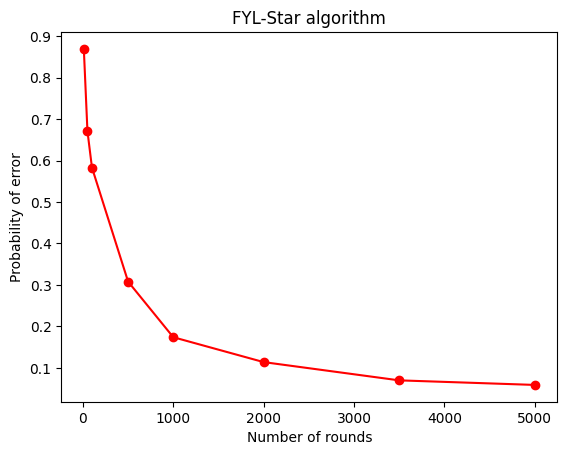

In [54]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
p_error_FYL = []
for i in n:
    print("Current number of rounds: ", i)
    p_error_FYL.append(1 - FYL_star(i, 15, 1000)[0])
    print("Probability of Error:", p_error_FYL[-1])
    
plt.plot(n, p_error_FYL, marker='o', color='r')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('FYL-Star algorithm')

## Plot for performance on star network

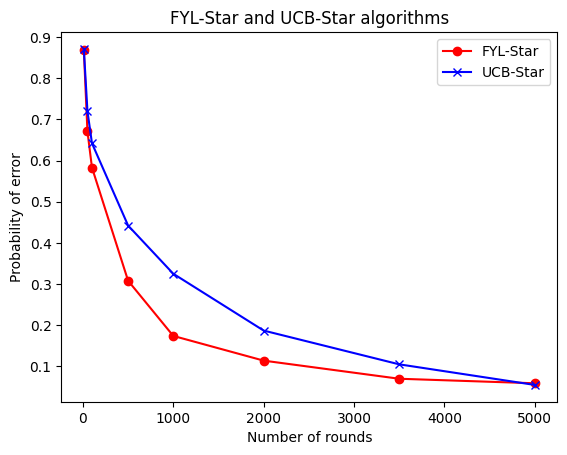

In [55]:
plt.plot(n, p_error_FYL, marker='o', color='r')
plt.plot(n, p_error_UCB, marker='x', color='b')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('FYL-Star and UCB-Star algorithms')
plt.legend(['FYL-Star', 'UCB-Star'])
plt.show()

## UCB-DSP Algorithm - Partition 1

Text(0.5, 1.0, 'UCB-DSP algorithm')

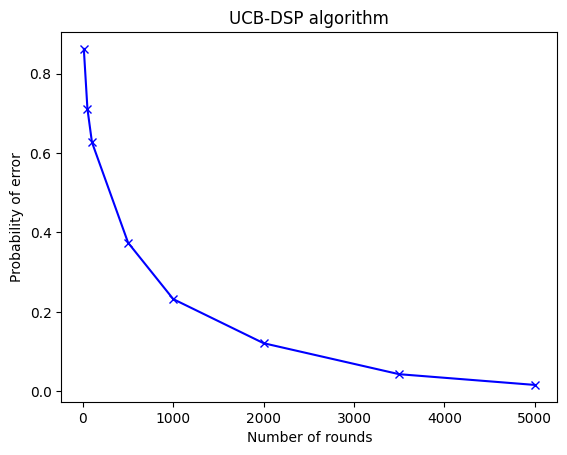

In [5]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
m = [6, 4, 3, 2]
p_error_UCB_DSP_var1 = []
num_simulations = 1000

for i in n:
    success = 0
    for _ in range(num_simulations):
        mu_hub = []
        cnt_hub = []
        for j in range(len(m)):
            result = UCB_star(i, m[j], 1)
            mu_hub.append(result[1][0])
            cnt_hub.append(result[2][0])
        mu_hub = np.array(mu_hub)
        cnt_hub = np.array(cnt_hub)
        best_arm = np.argmax((np.sum(mu_hub*cnt_hub, axis=0)/np.sum(cnt_hub, axis=0)))
        if best_arm == 9:
            success += 1
    p_error_UCB_DSP_var1.append(1 - success/num_simulations)
    
plt.plot(n, p_error_UCB_DSP_var1, marker='x', color='b')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('UCB-DSP algorithm')

## FYL-DSP Algorithm - Partition 1

Text(0.5, 1.0, 'FYL-DSP algorithm')

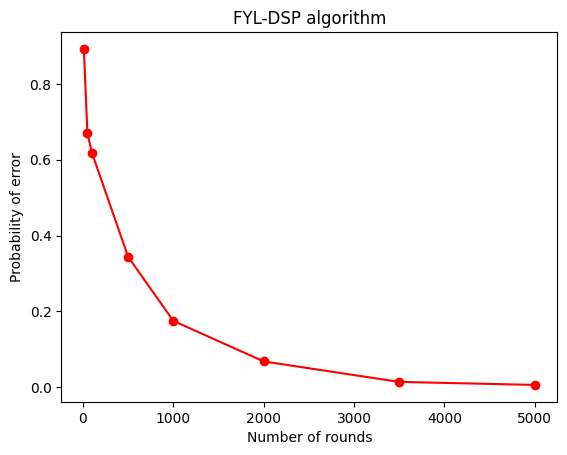

In [6]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
m = [6, 4, 3, 2]
p_error_FYL_DSP_var1 = []
num_simulations = 1000

for i in n:
    success = 0
    for _ in range(num_simulations):
        mu_hub = []
        cnt_hub = []
        for j in range(len(m)):
            result = FYL_star(i, m[j], 1)
            mu_hub.append(result[1][0])
            cnt_hub.append(result[2][0])
        mu_hub = np.array(mu_hub)
        cnt_hub = np.array(cnt_hub)
        best_arm = np.argmax((np.sum(mu_hub*cnt_hub, axis=0)/np.sum(cnt_hub, axis=0)))
        if best_arm == 9:
            success += 1
    p_error_FYL_DSP_var1.append(1 - success/num_simulations)
    
plt.plot(n, p_error_FYL_DSP_var1, marker='o', color='r')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('FYL-DSP algorithm')

## UCB-DSP Algorithm - Partition 2

Text(0.5, 1.0, 'UCB-DSP algorithm')

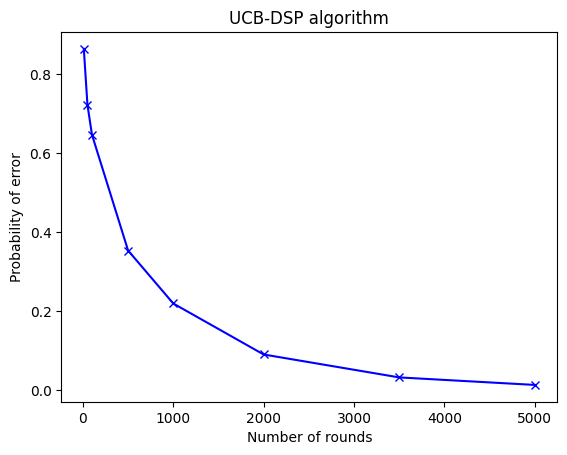

In [7]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
m = [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
p_error_UCB_DSP_var2 = []
num_simulations = 1000

for i in n:
    success = 0
    for _ in range(num_simulations):
        mu_hub = []
        cnt_hub = []
        for j in range(len(m)):
            result = UCB_star(i, m[j], 1)
            mu_hub.append(result[1][0])
            cnt_hub.append(result[2][0])
        mu_hub = np.array(mu_hub)
        cnt_hub = np.array(cnt_hub)
        best_arm = np.argmax((np.sum(mu_hub*cnt_hub, axis=0)/np.sum(cnt_hub, axis=0)))
        if best_arm == 9:
            success += 1
    p_error_UCB_DSP_var2.append(1 - success/num_simulations)
    
plt.plot(n, p_error_UCB_DSP_var2, marker='x', color='b')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('UCB-DSP algorithm')

## FYL-DSP Algorithm - Partition 2

Text(0.5, 1.0, 'FYL-DSP algorithm')

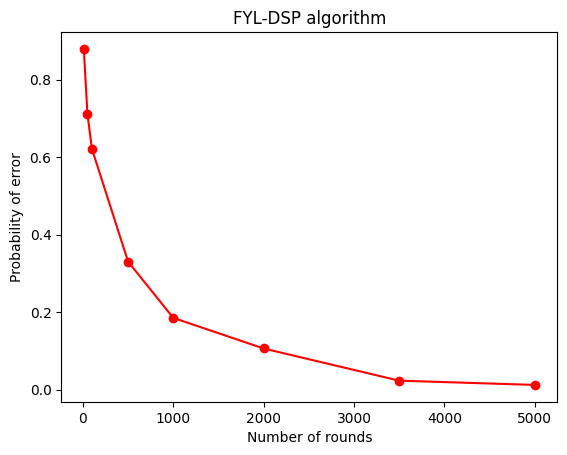

In [8]:
n = [10, 50, 100, 500, 1000, 2000, 3500, 5000]
m = [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
p_error_FYL_DSP_var2 = []
num_simulations = 1000

for i in n:
    success = 0
    for _ in range(num_simulations):
        mu_hub = []
        cnt_hub = []
        for j in range(len(m)):
            result = FYL_star(i, m[j], 1)
            mu_hub.append(result[1][0])
            cnt_hub.append(result[2][0])
        mu_hub = np.array(mu_hub)
        cnt_hub = np.array(cnt_hub)
        best_arm = np.argmax((np.sum(mu_hub*cnt_hub, axis=0)/np.sum(cnt_hub, axis=0)))
        if best_arm == 9:
            success += 1
    p_error_FYL_DSP_var2.append(1 - success/num_simulations)
    
plt.plot(n, p_error_FYL_DSP_var2, marker='o', color='r')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('FYL-DSP algorithm')

## Plot for performance on general network

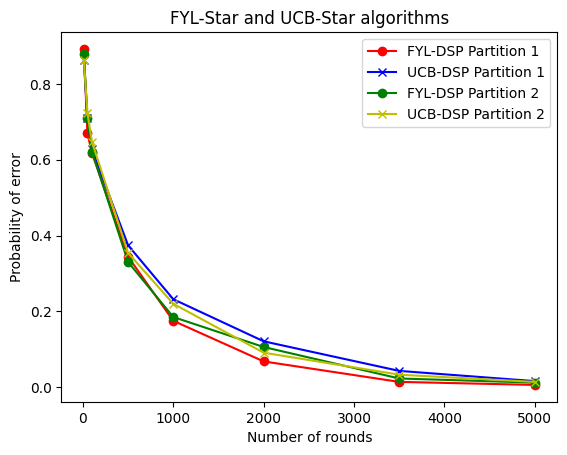

In [9]:
plt.plot(n, p_error_FYL_DSP_var1, marker='o', color='r')
plt.plot(n, p_error_UCB_DSP_var1, marker='x', color='b')
plt.plot(n, p_error_FYL_DSP_var2, marker='o', color='g')
plt.plot(n, p_error_UCB_DSP_var2, marker='x', color='y')
plt.xlabel('Number of rounds')
plt.ylabel('Probability of error')
plt.title('FYL-Star and UCB-Star algorithms')
plt.legend(['FYL-DSP Partition 1', 'UCB-DSP Partition 1', 'FYL-DSP Partition 2', 'UCB-DSP Partition 2'])
plt.show()